---
title: Feature Importance Analysis
jupyter: python3
---

## Introduction

Feature importance analysis is used to understand the usefulness or value of each feature in making predictions. The goal is to identify the most influential features that have the greatest impact on the model’s output. Feature Importance Analysis is widely used in machine learning to enhance model interpretability and performance.

## Why is Feature Importance Analysis Important?

In a dataset with dozens or even hundreds of features, each feature may contribute to the performance of your machine learning model. However, not all features are equally valuable. Some may be redundant or irrelevant, increasing the complexity of the model and potentially leading to overfitting. Feature importance analysis helps identify and prioritize the most influential features, improving model efficiency, interpretability, and generalization.

Feature importance analysis helps identify and focus on the most informative features, leading to several key advantages:

1. **Improved Model Performance**.
By selecting the most relevant features, the model can make more accurate predictions. Removing irrelevant or redundant features helps the model learn more effectively and generalize better to unseen data.

2. **Reduced Overfitting**.
Using too many features, especially those that are not informative, can cause the model to learn noise rather than meaningful patterns. Feature importance analysis helps eliminate unnecessary features, reducing the risk of overfitting and improving the model's ability to perform well on new data.

3. **Faster Training and Inference**.
With fewer but more relevant features, the computational cost of training the model decreases. This leads to faster model training and inference times, making it more efficient for large-scale applications.

4. **Enhanced Interpretability**.
Understanding which features contribute the most to predictions allows data scientists and domain experts to interpret model decisions more easily. This is particularly important in high-stakes applications like healthcare and finance, where model transparency is crucial.

Now, let's explore some common methods for feature importance analysis in `scikit-learn`.

## Feature Importance Analysis Methods

Let's explore [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset). This dataset includes information from 569 instances, with 30 numeric, predictive attributes such as radius, texture, perimeter, etc. Each sample is also labeled with a class that indicates the diagnosis, which can either be malignant (M) or benign (B). This dataset is commonly used for classification tasks, where the goal is to predict whether a tumor is malignant or benign based on the attributes.

In [1]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer (as_frame=True, return_X_y=True)
y = y.astype("category")
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Let's get the attribute names.

In [2]:
from sklearn.datasets import load_breast_cancer

# load dataset
X, y = load_breast_cancer (as_frame=True, return_X_y=True)

# get attribute information
column_names = X.columns
for index, column_name in enumerate(column_names):
  print(index, column_name)

0 mean radius
1 mean texture
2 mean perimeter
3 mean area
4 mean smoothness
5 mean compactness
6 mean concavity
7 mean concave points
8 mean symmetry
9 mean fractal dimension
10 radius error
11 texture error
12 perimeter error
13 area error
14 smoothness error
15 compactness error
16 concavity error
17 concave points error
18 symmetry error
19 fractal dimension error
20 worst radius
21 worst texture
22 worst perimeter
23 worst area
24 worst smoothness
25 worst compactness
26 worst concavity
27 worst concave points
28 worst symmetry
29 worst fractal dimension


## Built-in Feature Importance

Machine learning models such as linear regression and random forests have built-in capabilities to directly output feature importance scores. These scores provide insight into the contribution of each feature to the final prediction made by the model. Understanding feature importance is crucial, as it helps identify which input variables are the most influential in determining the model's output.

For example, Random Forests Model evaluates how much each feature contributes to reducing the error in the model's predictions. The attribute `feature_importances_` can be used to access this information. In Random Forests, features that lead to larger reductions in prediction error across the trees are assigned higher importance scores. The importance score for a feature is typically calculated by aggregating the reduction in impurity (e.g., Gini impurity or entropy) across all the trees in the forest, weighted by the number of samples each tree uses.

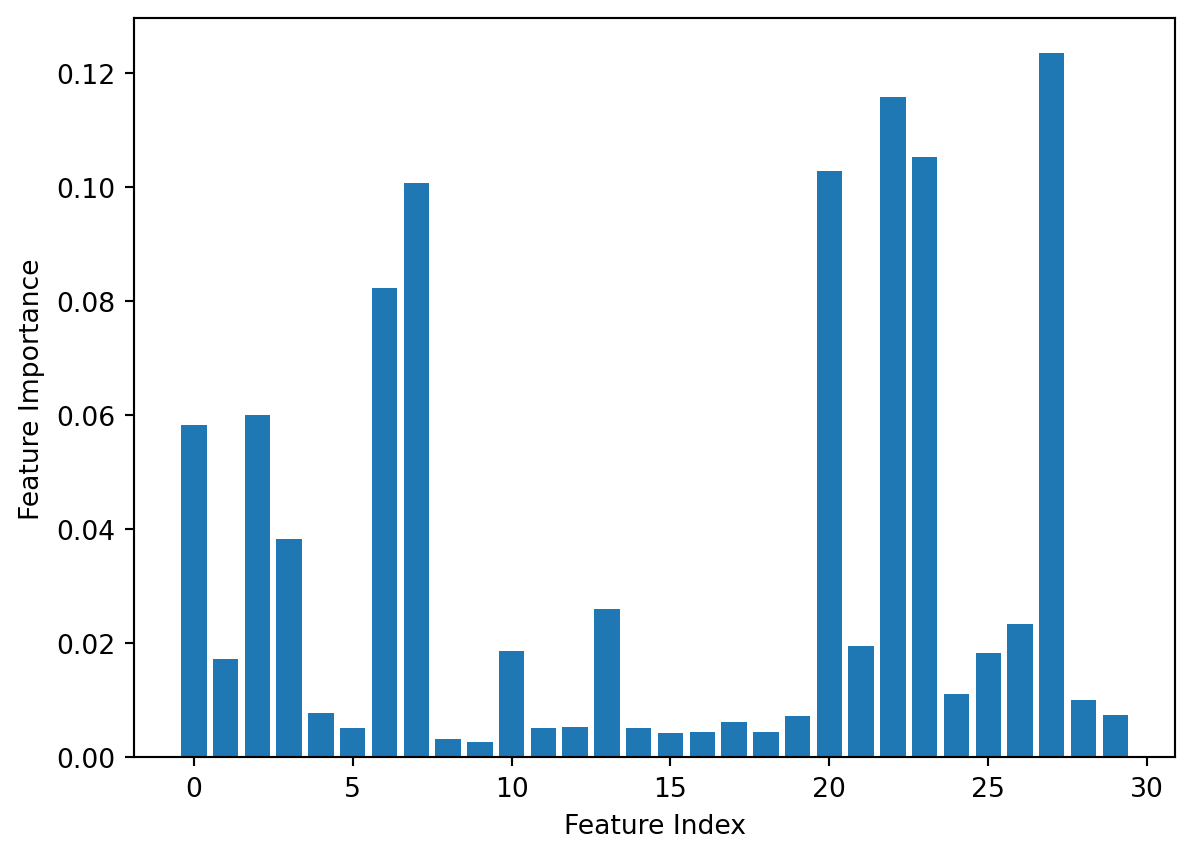

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# load dataset
X, y = load_breast_cancer(return_X_y=True)

# train model
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X, y)

# get feature importances
importances = rf.feature_importances_

# plot importances
plt.bar(range(X.shape[1]), importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.show()

For features with high feature importance, it indicates that the feature is very useful in distinguishing between malignant and benign tumors, and the model relies on it to make predictions.

For features with low feature importance, it suggests that the feature has a minimal impact on the model's predictions. This feature may not contribute significantly to distinguishing the target variable (whether the tumor is malignant or benign).

## Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a feature selection method that recursively removes features and evaluates the impact on the performance of the model. The process works by fitting the model multiple times and progressively eliminating the least important features based on a certain criterion, such as the feature’s weight or coefficient. By repeatedly evaluating the model's performance, RFE identifies which features contribute the most to the model's predictive power.

In sklearn, RFE can be implemented using the `RFE` class. This function allows users to specify the estimator (such as a linear regression or decision tree model) that will be used to evaluate the importance of each feature. The `n_features_to_select` parameter specifies how many features to keep, and the process will stop once the specified number of features is reached.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt

# load dataset
X, y = load_breast_cancer(as_frame=True,return_X_y=True)

# train model
rf = RandomForestClassifier()
rfe = RFE(rf, n_features_to_select=10)
rfe.fit(X, y)

# print importance
print(rfe.ranking_)

[ 1  4  1  1 12 11  1  1 19 18  8 20  7  2 13 17 14 21 16 15  1  1  1  1
  6  9  3  1  5 10]


For the output array, each element corresponds to the ranking of the respective feature, with a higher rank indicating greater feature importance.

## Permutation Importance

Permutation Importance evaluates the importance of each feature by randomly shuffling its values and observing how the model's performance decreases. This method works by permuting (randomizing) the values of each feature one at a time and measuring the impact on the model's accuracy.

In sklearn, the `permutation_importance` function can be used to compute permutation importance scores. This function takes the fitted model, the validation data, and the target values as inputs and returns the importance scores for each feature based on how much the model's performance drops when the feature is permuted.

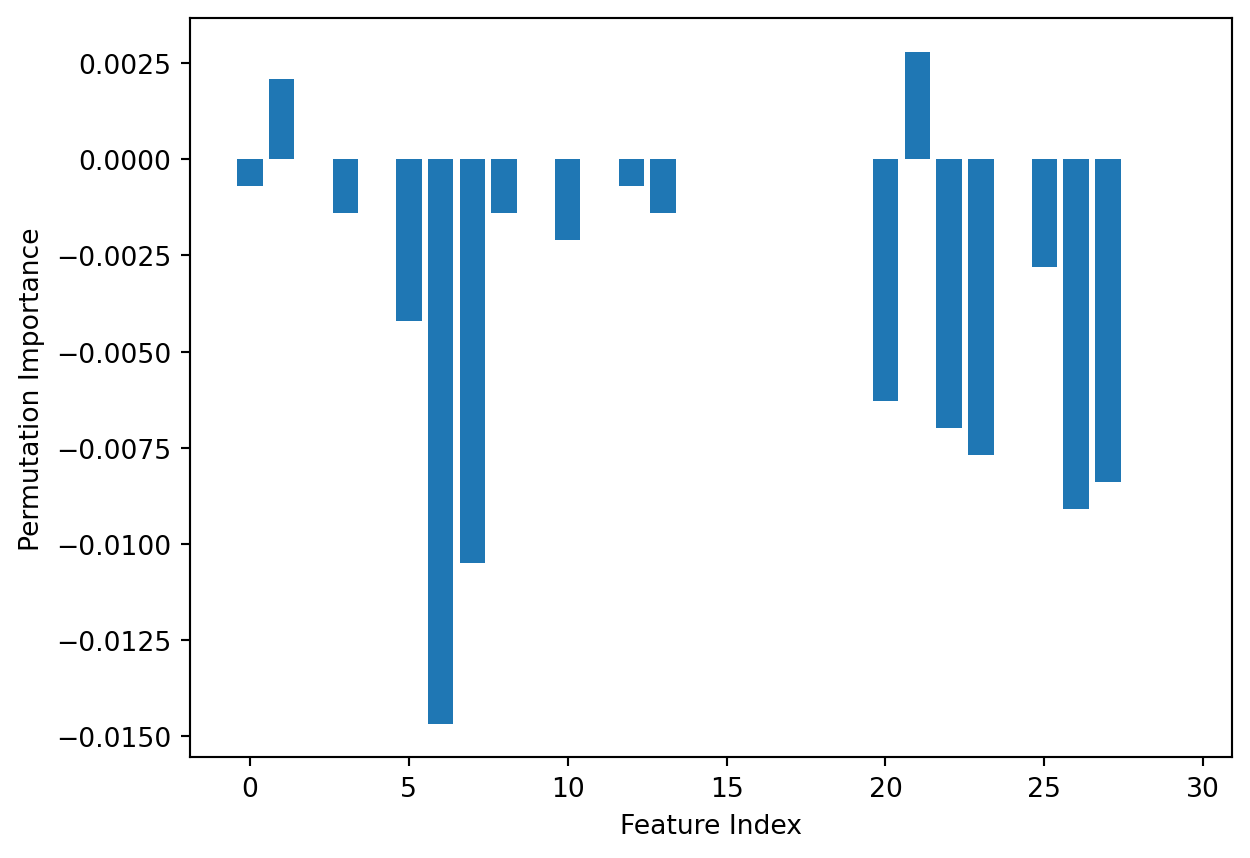

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# load dataset
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

# train model
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

# get permutation importance
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=1, scoring='accuracy')
importances = result.importances_mean

# plot importances
plt.bar(range(len(importances)), importances)
plt.xlabel('Feature Index')
plt.ylabel('Permutation Importance')
plt.show()

A feature with high permutation importance indicates that when its values are randomly shuffled, the model's performance (e.g., accuracy, mean squared error) drops significantly. This suggests that the feature contains crucial information that strongly influences the target variable.

A feature with low permutation importance means that when its values are randomly shuffled, the model's performance remains nearly unchanged. This implies that the feature may be irrelevant, redundant, or contain too much noise. Such features can be considered for removal or further analysis to assess their necessity.

## Analysis of Variance (ANOVA)

Analysis of Variance (ANOVA) is a statistical method used to analyze the differences among group means and their associated variances. In the context of feature importance analysis, ANOVA is used to determine how strongly each feature is related to the target variable.

In sklearn, the `f_classif()` function is commonly used to perform ANOVA for classification tasks. It calculates the F-statistic for each feature, which measures the ratio of variance between groups to the variance within the groups.


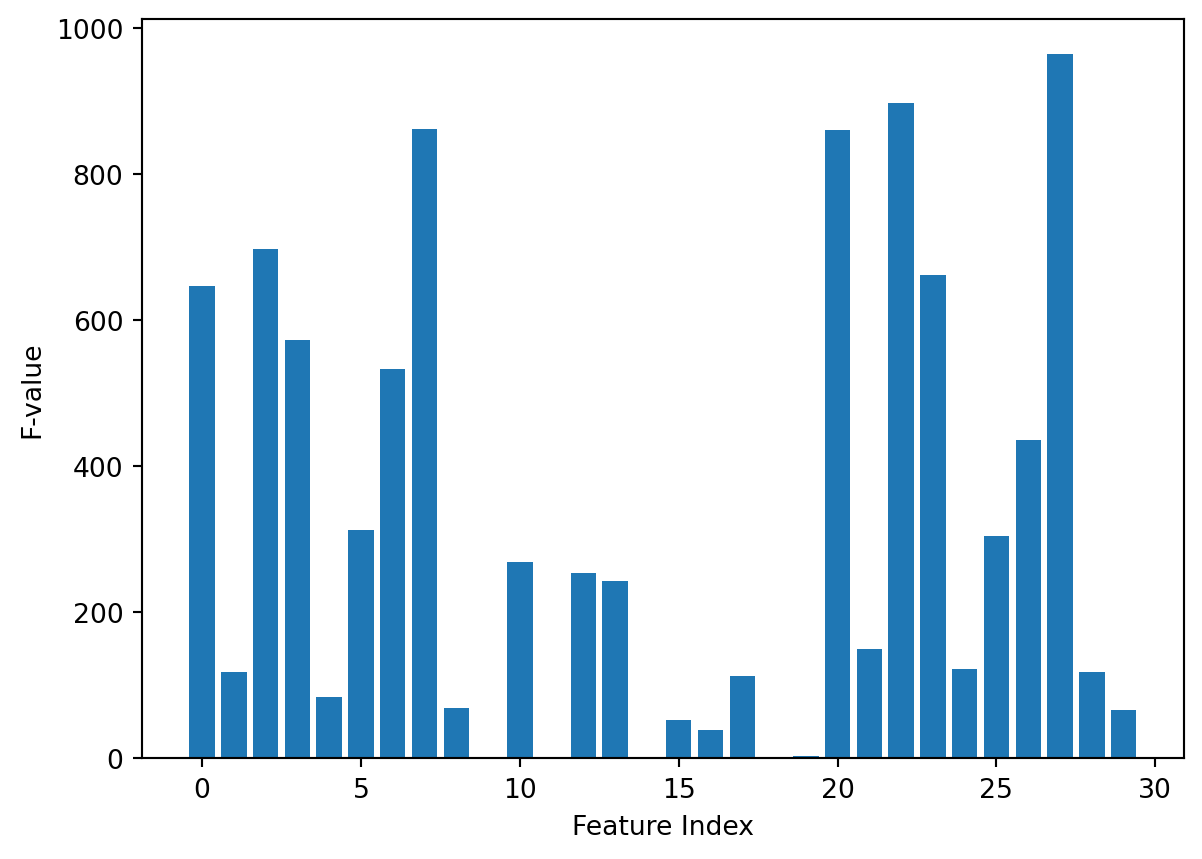

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import f_classif
import pandas as pd
import matplotlib.pyplot as plt

# load dataset
X, y = load_breast_cancer(as_frame=True,return_X_y=True)

# ANOVA
df = pd.DataFrame(X, columns=range(len(X.columns)))
df['y'] = y
fval = f_classif(X, y)
fval = pd.Series(fval[0], index=range(X.shape[1]))

# plot importances
plt.bar(range(X.shape[1]), fval)
plt.xlabel('Feature Index')
plt.ylabel('F-value')
plt.show()

A feature with a higher F-value indicates that it provides more information about the target variable. It suggests that the feature is more discriminative in separating different classes.

A low F-value means that the feature is not very useful for distinguishing between the target variable’s categories, suggesting a weaker relationship.

## Chi-Square Test

The Chi-Square Test is a statistical method used to assess whether there is a significant relationship between two categorical variables. In the context of feature importance analysis, the Chi-Square test is commonly used to evaluate the independence of each feature from the target variable.

In sklearn, the `chi2()` function is used to perform the Chi-Square test for feature selection. It calculates the Chi-Square statistic for each feature, which measures how much the observed frequency of feature categories deviates from the expected frequency if the feature and target were independent.

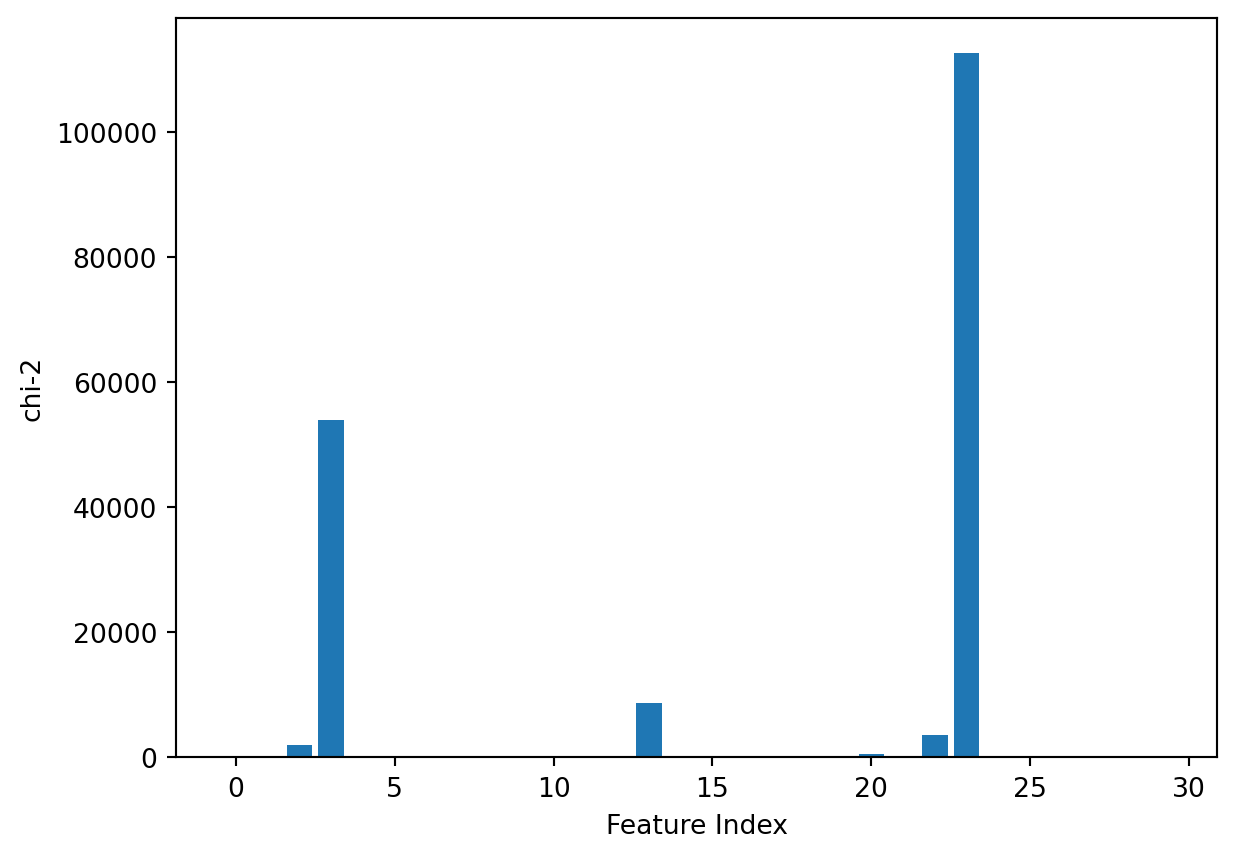

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import chi2
import pandas as pd
import matplotlib.pyplot as plt

# load dataset
X, y = load_breast_cancer(as_frame=True,return_X_y=True)

# chi-2
df = pd.DataFrame(X, columns=range(len(X.columns)))
df['y'] = y
chi_scores = chi2(X, y)
chi_scores = pd.Series(chi_scores[0], index=range(X.shape[1]))

# plot importances
plt.bar(range(X.shape[1]), chi_scores)
plt.xlabel('Feature Index')
plt.ylabel('chi-2')
plt.show()

A feature with a high Chi-Square statistic suggests that the feature is dependent on the target variable. This means the feature has a significant relationship with the target and is likely useful for prediction.

A low Chi-Square statistic indicates that the feature is independent of the target variable, meaning it does not provide useful information for prediction.
